マルコフ連鎖で訪日客数をシミュレーション

In [ ]:
import random

def build_population_chain():
    chain = {
        1: {1: 0.4, 2: 0.3, 3: 0.2, 4: 0.05, 5: 0.05},
        2: {1: 0.3, 2: 0.4, 3: 0.2, 4: 0.05, 5: 0.05},
        3: {1: 0.05, 2: 0.2, 3: 0.5, 4: 0.2, 5: 0.05},
        4: {1: 0.05, 2: 0.05, 3: 0.2, 4: 0.4, 5: 0.3},
        5: {1: 0.05, 2: 0.05, 3: 0.3, 4: 0.4, 5: 0.2}
    }
    return chain

def generate_population_sequence(chain, initial_state, length=365):
    current_population = initial_state
    generated_sequence = [current_population]

    for _ in range(length - 1):
        next_weather = random.choices(list(chain[current_population].keys()),weights=list(chain[current_population].values()))[0]
        generated_sequence.append(next_weather)
        current_weather = next_weather

    return generated_sequence

# マルコフ連鎖の構築
population_chain = build_population_chain()

# 初期状態が3の場合、人口の状態を生成
initial_state = 3
generated_sequence = generate_population_sequence(population_chain, initial_state, length=365)

# 生成された人口推移を表示
print(" ".join(map(str, generated_sequence)))


3 3 3 3 4 1 4 3 5 5 2 1 3 3 5 3 4 2 2 2 4 3 4 3 2 4 4 3 5 3 3 2 3 3 2 3 4 3 2 3 4 3 3 4 3 3 3 4 5 3 3 4 4 4 3 3 2 2 3 2 2 5 5 5 3 3 2 2 3 3 4 3 3 3 3 4 1 3 3 5 3 2 3 2 2 3 3 2 2 3 3 3 3 3 3 3 2 3 4 3 3 3 3 3 4 3 4 5 4 3 3 4 2 2 2 3 4 3 3 3 3 4 2 2 1 3 4 3 3 3 3 3 3 5 2 3 3 3 5 3 3 4 2 3 3 3 3 2 3 2 3 3 4 3 4 1 3 2 2 5 4 5 2 2 4 3 3 3 3 3 3 3 4 3 2 3 3 3 4 2 2 2 4 4 3 3 3 3 3 3 2 3 4 2 3 3 2 2 4 3 2 4 1 3 2 4 2 3 2 3 3 1 3 3 4 5 3 2 4 2 3 2 3 4 3 3 3 3 4 3 3 3 2 3 3 3 3 3 3 2 2 2 4 3 4 3 3 4 1 2 4 4 3 2 3 2 2 2 3 3 3 2 3 3 3 4 2 3 3 4 2 2 3 5 4 4 2 3 2 2 4 2 3 5 2 1 2 3 3 3 3 3 3 3 3 2 3 3 3 1 2 3 3 2 3 2 3 3 3 4 3 3 3 3 3 3 2 2 4 3 4 2 2 3 2 3 4 4 5 3 5 4 3 3 4 4 3 4 3 2 3 3 4 3 3 5 4 3 5 2 3 3 1 3 2 2 4 3 3 2 3 4 3 3 2


マルコフ連鎖30回分

In [ ]:
sequences = []
for _ in range(30):
    initial_state = random.randint(1, 5)  # 初期状態をランダムに選択
    generated_sequence = generate_population_sequence(population_chain, initial_state, length=365)
    sequences.append(generated_sequence)

# 生成された30個の人口推移を表示
for index, sequence in enumerate(sequences, start=1):
    print(f"Generated Sequence {index}: {' '.join(map(str, sequence))}")

Generated Sequence 1: 5 1 4 4 3 4 4 4 3 5 3 4 4 5 1 4 4 5 5 3 4 4 5 3 3 1 4 4 4 4 4 3 3 4 3 5 3 4 3 4 3 4 4 5 5 3 1 4 5 3 4 4 3 4 3 3 5 1 4 4 3 5 3 3 4 4 3 5 1 5 4 4 2 4 4 5 2 5 3 3 5 3 5 3 4 5 3 4 3 4 4 4 3 4 2 5 5 1 3 3 5 5 4 4 5 1 5 3 5 5 3 3 1 2 3 3 3 4 3 5 4 4 3 5 3 3 4 5 3 5 4 1 5 4 3 4 5 5 4 3 3 5 4 4 3 3 5 4 2 3 3 5 4 4 4 3 4 3 1 4 4 4 5 5 2 3 2 4 5 4 3 4 4 5 3 1 5 4 2 3 1 4 4 3 4 5 4 4 5 3 3 4 4 3 2 4 3 1 4 4 3 4 4 3 4 5 4 4 2 2 3 5 2 3 3 4 3 4 3 3 2 3 5 4 5 1 4 3 3 3 4 1 4 4 3 5 5 4 4 4 4 3 3 3 4 3 4 4 4 4 3 5 3 3 3 3 2 5 4 4 2 2 3 4 3 4 3 3 3 4 2 1 4 5 5 4 3 4 5 3 3 4 5 4 3 2 3 5 3 3 5 5 5 4 4 4 4 3 5 4 3 3 4 3 5 4 4 3 4 3 5 3 1 3 3 3 4 2 3 5 5 3 4 3 5 3 4 4 2 4 1 4 4 3 5 4 5 1 1 2 4 2 4 3 4 3 4 4 4 5 5 4 5 3 3 4 4 5 5 3 4 5 3 5 4
Generated Sequence 2: 3 3 2 5 3 3 3 2 2 2 3 5 2 3 4 3 2 2 2 3 4 3 2 4 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 1 5 4 4 2 4 3 4 5 4 3 3 3 3 3 3 4 3 2 2 2 5 3 3 3 5 3 2 3 2 3 3 2 3 4 4 2 4 4 3 4 3 3 3 3 3 4 4 3 2 5 5 1 5 3 4 2 3 4 3 2 4 3 1 3 2 4 3 2 2 2 5 3 

価格変動ありのシミュレーション

In [ ]:
def simulate_arrivals():
    num_days = 365
    base_arrivals = 10000
    a_coin = 1.0
    b_coin = 1.0
    A_stayer_sum = [10000]
    B_stayer_sum = [0]

    for day in range(num_days):

        k_rate = generated_sequence[day]
        if k_rate == 1:
            fact_arrivals = base_arrivals * 0.8
        elif k_rate == 2:
            fact_arrivals = base_arrivals * 0.9
        elif k_rate == 3:
            fact_arrivals = base_arrivals * 1.0
        elif k_rate == 4:
            fact_arrivals = base_arrivals * 1.1
        elif k_rate == 5:
            fact_arrivals = base_arrivals * 1.2

        if A_stayer_sum[day] > 9000:
            c_over = (A_stayer_sum[day] - 9000) / 9000
            a_coin *= 1
            b_coin *= (1 + c_over)
        else:
            a_coin *= 1
            b_coin *= 1
        r = b_coin / a_coin

        if r >= 1.1:
            A_stayer = fact_arrivals * 0.2
            B_stayer = fact_arrivals * 0.8
        elif 1 < r < 1.1:
            A_stayer = fact_arrivals * 0.6
            B_stayer = fact_arrivals * 0.4
        else:
            A_stayer = fact_arrivals
            B_stayer = 0

        A_stayer_sum.append(A_stayer)
        B_stayer_sum.append(B_stayer)

        if 1.1 < r <= 1.25:
            A_stayer = fact_arrivals * 0.9
            B_stayer = fact_arrivals * 0.1
        elif 1.25 <= r < 1.5:
            A_stayer = fact_arrivals * 0.8
            B_stayer = fact_arrivals * 0.2
        elif 1.5 <= r < 1.75:
            A_stayer = fact_arrivals * 0.7
            B_stayer = fact_arrivals * 0.3
        elif r >= 1.75:
            A_stayer = fact_arrivals * 0.6
            B_stayer = fact_arrivals * 0.4
        else:
            A_stayer = fact_arrivals
            B_stayer = 0

        A_stayer_sum.append(A_stayer)
        B_stayer_sum.append(B_stayer)
    return sum(A_stayer_sum)


In [ ]:
#為替変動ありバージョンのシミュレーション
specific_simulation_results=[]
for i in range(30):
  generate_sequence=sequences[i]
  total_A_stayers=simulate_arrivals()
  specific_simulation_results.append(total_A_stayers)

for i in specific_simulation_results:
  print(i)

3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0
3086300.0


通常バージョンのシミュレーション

In [ ]:
import random

def normal_simulation(num_days=365,base_arrivals=10000):
  Normal_stayer_sum = [10000]
  for day in range(num_days):
    k_rate = generated_sequence[day]
    if k_rate==1:
        fact_arrivals = base_arrivals * 0.8
    elif k_rate==2:
        fact_arrivals = base_arrivals * 0.9
    elif k_rate==3:
        fact_arrivals = base_arrivals * 1.0
    elif k_rate==4:
        fact_arrivals = base_arrivals * 1.1
    elif k_rate==5:
        fact_arrivals=base_arrivals * 1.2
    Normal_stayer_sum.append(fact_arrivals)
  return sum(Normal_stayer_sum)

In [ ]:
#通常バージョンのシミュレーション
normal_simulation_results=[]
for i in range(30):
  generated_sequence=sequences[i]
  total_A_stayers=normal_simulation()
  normal_simulation_results.append(total_A_stayers)

for i in normal_simulation_results:
  print(i)

4000000.0
3356000.0
3910000.0
3896000.0
3980000.0
3307000.0
3997000.0
3278000.0
3927000.0
3939000.0
3336000.0
3888000.0
3981000.0
3310000.0
3891000.0
3329000.0
3368000.0
3959000.0
3278000.0
3907000.0
3287000.0
3310000.0
3404000.0
3376000.0
3911000.0
3313000.0
3900000.0
3923000.0
3960000.0
3897000.0


30回分


In [ ]:
#30回のシミュレーションを実行
simulation_results=[]
coin_results=[]
for _ in range(30):
  simulation_results=simulation()
  simulation_results.append(returns[0])
  coin_results.append(returns[1])

for i in simulation_results:
    print(i)
for l in coin_results:
  print(l)



NameError: ignored

人口の違い


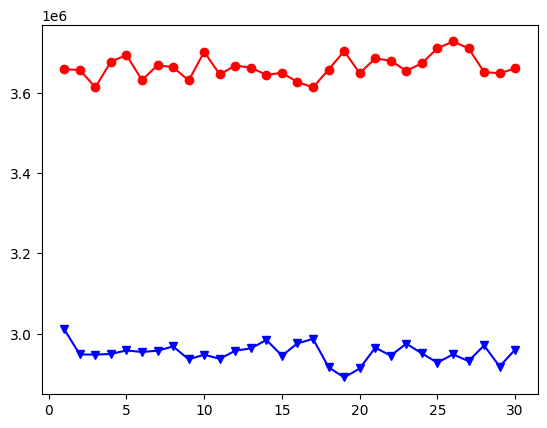

In [ ]:
x=list(range(1,31))
plt.plot(x, normal_simulation_results, marker = "o", color = "red")
plt.plot(x, simulation_results, marker = "v", color = "blue")
plt.show()

為替の動き

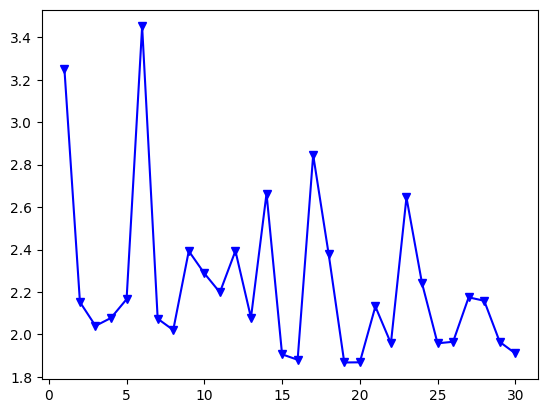

In [ ]:
c=list(range(1,31))
plt.plot(c,coin_results,marker="v",color="blue")
plt.show()

In [ ]:
#京都のキャパが6000人だと仮定
#為替弾力性を1

import random
import math
from matplotlib import pyplot as pyp

num_days = 365
base_arrivals = 10000
a_coin = 1.0
b_coin = 1.0
A_stayer_sum = [10000]
B_stayer_sum = [0]
coin_exchange=[1]

for day in range(num_days):
    k_rate = random.random()
    if 0 <= k_rate < 0.25:
        fact_arrivals = base_arrivals * 0.9
    elif 0.25 <= k_rate < 0.5:
        fact_arrivals = base_arrivals * 0.8
    elif 0.5 <= k_rate < 0.75:
        fact_arrivals = base_arrivals * 1.1
    elif 0.75 <= k_rate <= 1.0:
        fact_arrivals = base_arrivals * 1.2

    print(str(day) + '日目の訪日者数は' + str(fact_arrivals))

    if A_stayer_sum[day]>9000:
      c_over=(A_stayer_sum[day]-9000)/9000
      a_coin*=1
      b_coin*=(1+c_over)
    else:
      a_coin*=1
      b_coin*=1
    r=(b_coin-a_coin)/a_coin
    r=round(r,2)


    if r >= 1:
        A_stayer = fact_arrivals * r
        B_stayer = fact_arrivals-A_stayer
    else:
        A_stayer = fact_arrivals
        B_stayer = 0

    A_stayer_sum.append(A_stayer)
    B_stayer_sum.append(B_stayer)

    print('前日の宿泊者数は' + str(A_stayer_sum[day]))
    print(str(day) + '日目のA地域の宿泊者数は:' + str(format(A_stayer, '.2f')))
    print(str(day) + '日目のB地域の宿泊者数は:' + str(format(B_stayer, '.2f')))
    print(str(day) + '日目のaコインは' + str(a_coin) + ' bコインは' + str(b_coin))

print(sum(A_stayer_sum))

0日目の訪日者数は12000.0
前日の宿泊者数は10000
0日目のA地域の宿泊者数は:12000.00
0日目のB地域の宿泊者数は:0.00
0日目のaコインは1.0 bコインは1.1111111111111112
1日目の訪日者数は9000.0
前日の宿泊者数は12000.0
1日目のA地域の宿泊者数は:9000.00
1日目のB地域の宿泊者数は:0.00
1日目のaコインは1.0 bコインは1.4814814814814814
2日目の訪日者数は11000.0
前日の宿泊者数は9000.0
2日目のA地域の宿泊者数は:11000.00
2日目のB地域の宿泊者数は:0.00
2日目のaコインは1.0 bコインは1.4814814814814814
3日目の訪日者数は8000.0
前日の宿泊者数は11000.0
3日目のA地域の宿泊者数は:8000.00
3日目のB地域の宿泊者数は:0.00
3日目のaコインは1.0 bコインは1.8106995884773662
4日目の訪日者数は11000.0
前日の宿泊者数は8000.0
4日目のA地域の宿泊者数は:11000.00
4日目のB地域の宿泊者数は:0.00
4日目のaコインは1.0 bコインは1.8106995884773662
5日目の訪日者数は9000.0
前日の宿泊者数は11000.0
5日目のA地域の宿泊者数は:10890.00
5日目のB地域の宿泊者数は:-1890.00
5日目のaコインは1.0 bコインは2.21307727480567
6日目の訪日者数は11000.0
前日の宿泊者数は10890.0
6日目のA地域の宿泊者数は:18480.00
6日目のB地域の宿泊者数は:-7480.00
6日目のaコインは1.0 bコインは2.6778235025148605
7日目の訪日者数は11000.0
前日の宿泊者数は18480.0
7日目のA地域の宿泊者数は:49500.00
7日目のB地域の宿泊者数は:-38500.00
7日目のaコインは1.0 bコインは5.4984642584971795
8日目の訪日者数は8000.0
前日の宿泊者数は49500.0
8日目のA地域の宿泊者数は:233920.00
8日目のB地域の宿泊者数は:-225920.00
8日目のaコインは1.0 bコインは30.

In [ ]:
#京都のキャパが9000人だと仮定

import random
from matplotlib import pyplot as pyp

num_days = 365
base_arrivals = 10000
a_coin = 1.0
b_coin = 1.0
A_stayer_sum = [10000]
B_stayer_sum = [0]
coin_exchange=[1]

for day in range(num_days):
    k_rate = generated_sequence[day]
    if k_rate==1:
        fact_arrivals = base_arrivals * 0.8
    elif k_rate==2:
        fact_arrivals = base_arrivals * 0.9
    elif k_rate==3:
        fact_arrivals = base_arrivals * 1.0
    elif k_rate==4:
        fact_arrivals = base_arrivals * 1.1
    elif k_rate==5:
        fact_arrivals=base_arrivals*1.2

    print(str(day) + '日目の訪日者数は' + str(fact_arrivals))

#前日のデータを基に為替を計算
    if A_stayer_sum[day]>9000:
      c_over=(A_stayer_sum[day]-9000)/9000
      a_coin*=1
      b_coin*=(1+c_over)
    else:
      a_coin*=1
      b_coin*=1
    r=b_coin/a_coin


    if r >= 1.1:
        A_stayer = fact_arrivals * 0.2
        B_stayer = fact_arrivals * 0.8
    elif 1< r < 1.1:
        A_stayer = fact_arrivals * 0.6
        B_stayer = fact_arrivals * 0.4
    else:
        A_stayer = fact_arrivals
        B_stayer = 0

    A_stayer_sum.append(A_stayer)
    B_stayer_sum.append(B_stayer)

    if 1.1<r<=1.25 :
        A_stayer = fact_arrivals * 0.9
        B_stayer=fact_arrivals*0.1

    elif 1.25 <= r < 1.5:
        A_stayer = fact_arrivals * 0.8
        B_stayer=fact_arrivals*0.2

    elif 1.5<=r<1.75:
        A_stayer = fact_arrivals*0.7
        B_stayer = fact_arrivals*0.3

    elif r>=1.75:
        A_stayer=fact_arrivals*0.6
        B_stayer=fact_arrivals*0.4
    else:
      A_stayer=fact_arrivals
      B_stayer=0
    A_stayer_sum.append(A_stayer)
    B_stayer_sum.append(B_stayer)

    print('前日の宿泊者数は' + str(A_stayer_sum[day]))
    print(str(day) + '日目のA地域の宿泊者数は:' + str(A_stayer))
    print(str(day) + '日目のB地域の宿泊者数は:' + str(B_stayer))
    print(str(day) + '日目のaコインは' + str(a_coin) + ' bコインは' + str(b_coin))

print(sum(A_stayer_sum))

0日目の訪日者数は10000.0
前日の宿泊者数は10000
0日目のA地域の宿泊者数は:9000.0
0日目のB地域の宿泊者数は:1000.0
0日目のaコインは1.0 bコインは1.1111111111111112
1日目の訪日者数は11000.0
前日の宿泊者数は2000.0
1日目のA地域の宿泊者数は:9900.0
1日目のB地域の宿泊者数は:1100.0
1日目のaコインは1.0 bコインは1.1111111111111112
2日目の訪日者数は10000.0
前日の宿泊者数は9000.0
2日目のA地域の宿泊者数は:9000.0
2日目のB地域の宿泊者数は:1000.0
2日目のaコインは1.0 bコインは1.1111111111111112
3日目の訪日者数は9000.0
前日の宿泊者数は2200.0
3日目のA地域の宿泊者数は:8100.0
3日目のB地域の宿泊者数は:900.0
3日目のaコインは1.0 bコインは1.1111111111111112
4日目の訪日者数は11000.0
前日の宿泊者数は9900.0
4日目のA地域の宿泊者数は:9900.0
4日目のB地域の宿泊者数は:1100.0
4日目のaコインは1.0 bコインは1.2222222222222223
5日目の訪日者数は10000.0
前日の宿泊者数は2000.0
5日目のA地域の宿泊者数は:9000.0
5日目のB地域の宿泊者数は:1000.0
5日目のaコインは1.0 bコインは1.2222222222222223
6日目の訪日者数は10000.0
前日の宿泊者数は9000.0
6日目のA地域の宿泊者数は:9000.0
6日目のB地域の宿泊者数は:1000.0
6日目のaコインは1.0 bコインは1.2222222222222223
7日目の訪日者数は10000.0
前日の宿泊者数は1800.0
7日目のA地域の宿泊者数は:9000.0
7日目のB地域の宿泊者数は:1000.0
7日目のaコインは1.0 bコインは1.2222222222222223
8日目の訪日者数は10000.0
前日の宿泊者数は8100.0
8日目のA地域の宿泊者数は:9000.0
8日目のB地域の宿泊者数は:1000.0
8日目のaコインは1.0 bコインは1.2222222222222223
9日目の